# Predicting House Prices using Ridge and Lasso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the data
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# 19 features have some null values
data.isnull().any().sum()

19

In [6]:
# features that have null value
data[data.columns[data.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# Null values for basement need not be removed as they in itself depict a case where basement is missing.
#replace them with string "no_basement"
data[data['BsmtExposure'].isnull()]['BsmtUnfSF'].head()

17     0
39     0
90     0
102    0
156    0
Name: BsmtUnfSF, dtype: int64

In [8]:
data["BsmtFinType2"].fillna("no_basement", inplace = True)

In [9]:
for i in ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1"]:
    data[i].fillna("no_basement", inplace = True)

In [10]:
# Null values for FireplaceQu need not be removed as they in itself depict a case where fireplace is missing.
# replace them with string "no_fireplace"
data[data['FireplaceQu'].isnull()][['FireplaceQu','Fireplaces']].head()

,FireplaceQu,Fireplaces
0,NaN,0
5,NaN,0
10,NaN,0
12,NaN,0
15,NaN,0


In [11]:
data["FireplaceQu"].fillna("no_fireplace", inplace = True)

In [12]:
# Null values for GarageYrBlt need not be removed as they in itself depict a case where garage is missing.
#replace them with string "no_garage"
data[data['GarageType'].isnull()][['GarageYrBlt','GarageArea']].head()

,GarageYrBlt,GarageArea
39,NaN,0
48,NaN,0
78,NaN,0
88,NaN,0
89,NaN,0


In [13]:
for i in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    data[i].fillna("no_garage", inplace = True)

In [14]:
# tricky as to what to take the year(GarageYrBlt) in case there is no garage at all
# will set it as 2120, as when age will be calculated, it'll be marked as -100.

# later set the year as 1990 after plotting the scatter plot with prices because the prices of houses with no garage was similar
# to the ones which were built the oldest.

In [15]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [16]:
data['GarageYrBlt'].fillna("2120.0", inplace = True)

In [17]:
data['GarageYrBlt'] = data['GarageYrBlt'].astype('float64')

In [18]:
data['GarageYrBlt'].describe()

count    1460.000000
mean     1986.356164
std        40.318275
min      1900.000000
25%      1962.000000
50%      1984.500000
75%      2003.000000
max      2120.000000
Name: GarageYrBlt, dtype: float64

In [19]:
# Null values for PoolQC need not be removed as they in itself depict a case where pool is missing.
#replace them with string "no_pool"
data[data['PoolQC'].isnull()][['PoolQC','PoolArea']].head()

,PoolQC,PoolArea
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0


In [20]:
data["PoolQC"].fillna("no_pool", inplace = True)

In [21]:
#similarly null values in fence needs to be replaced by "no_fence"

In [22]:
data["Fence"].fillna("no_fence", inplace = True)

In [23]:
#similarly null values in alley needs to be replaced by "no_alley"

In [24]:
data["Alley"].fillna("no_alley", inplace = True)

Imputing Lot Frontage from Lot Area -

In [25]:
#can lot frontage be estimated from lot area - 

In [26]:
(data['LotArea']/data['LotFrontage']).describe()

count    1201.000000
mean      142.493890
std        82.052885
min        26.915033
25%       115.625000
50%       129.625000
75%       150.000000
max      1434.966667
dtype: float64

In [27]:
# Using the mean 142 to derive lotfrontage

In [28]:
def fill_lotfrontage(Frontage,Area):
    if (Frontage is None):
        return Area/142
    else:
        return Area

In [29]:
data['LotFrontage'] = fill_lotfrontage(data['LotFrontage'],data['LotArea'])

In [30]:
#delete 8 rows where MasVnr is null

In [31]:
data.dropna(subset=['MasVnrType','Electrical'],inplace=True)

In [32]:
#take miscellaneous features as these features might highly inflate the pricing. Where it is null put "no_luxury"

In [33]:
data["MiscFeature"].fillna("no_luxury", inplace = True)

Calculating Age from the column named 'YearBuilt' and putting it in the column named 'YearBuilt'

In [34]:
data['YearBuilt'] = data['YearBuilt'].apply(lambda x:2020-int(x))

In [35]:
# all null values are worked upon
data[data.columns[data.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [36]:
# categorical columns
cat_cols = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

In [37]:
# numeric columns
num_cols = ['MSSubClass','OverallQual','OverallCond','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

In [38]:
len(cat_cols)

43

In [39]:
len(num_cols)

36

Analysing the trend of prices with respect to each feature - 

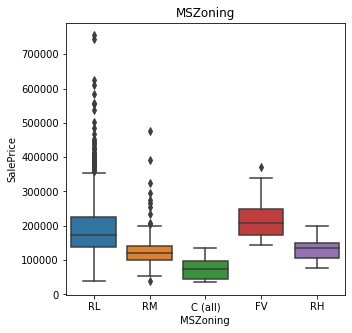

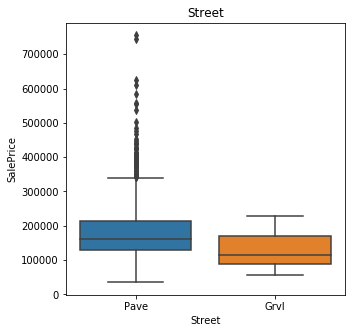

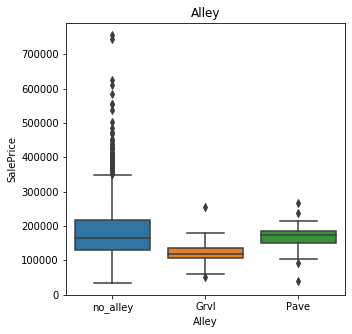

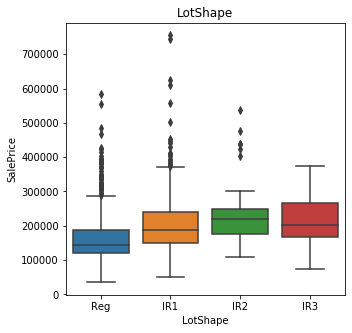

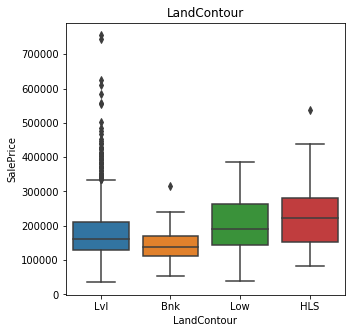

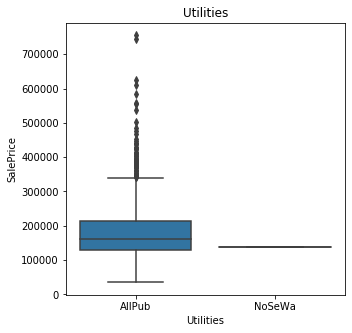

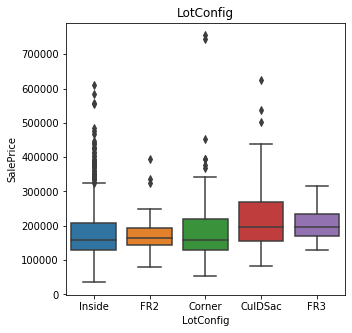

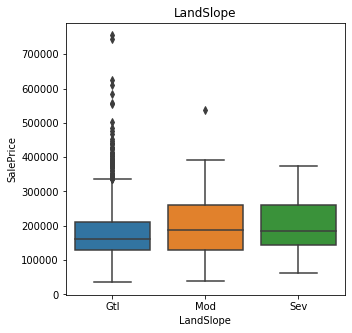

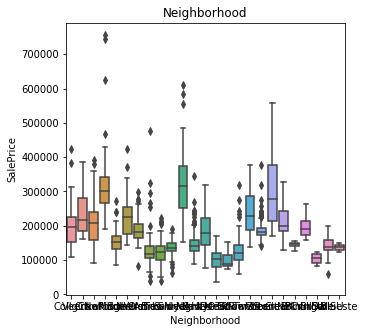

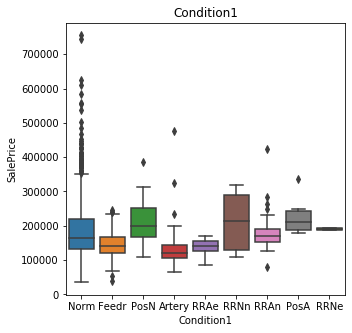

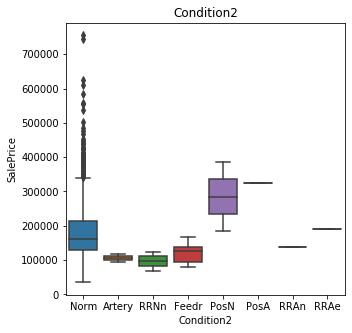

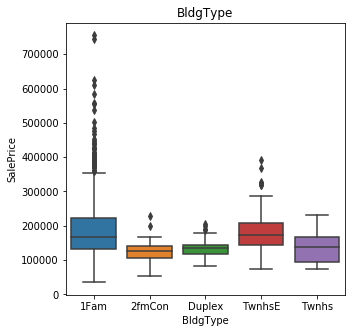

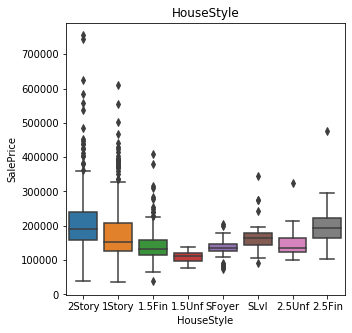

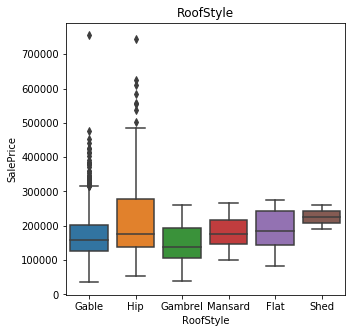

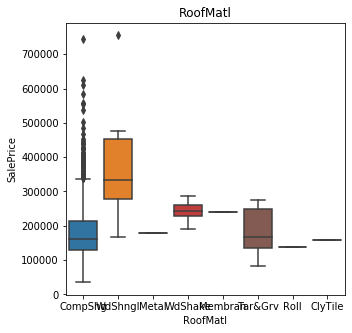

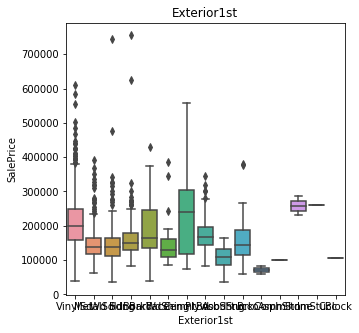

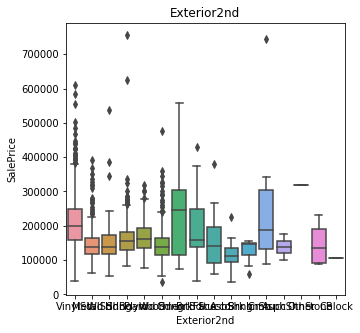

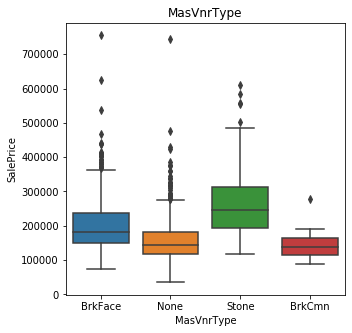

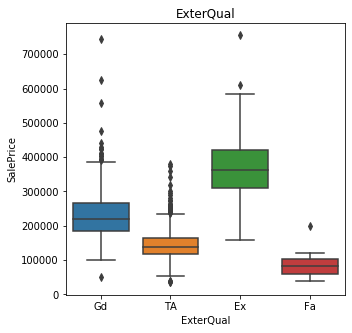

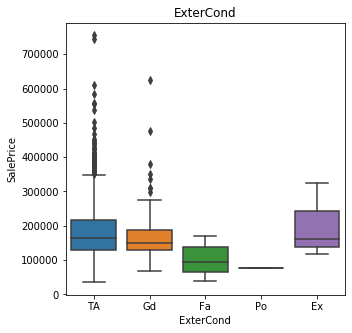

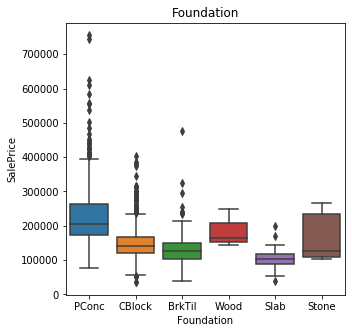

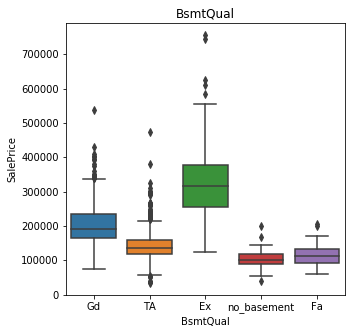

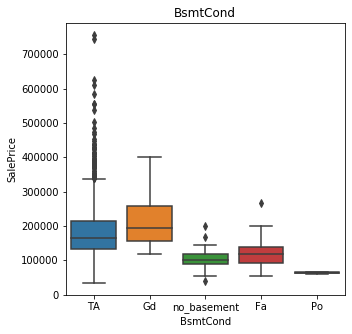

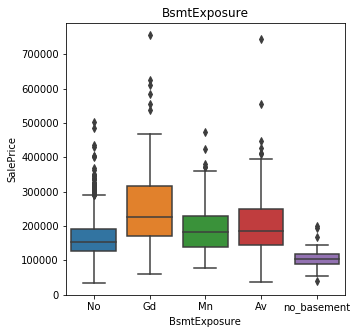

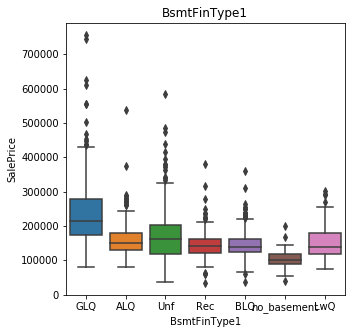

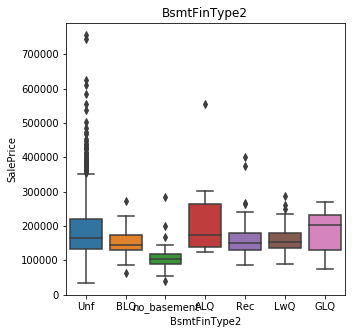

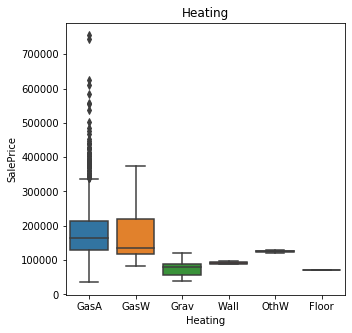

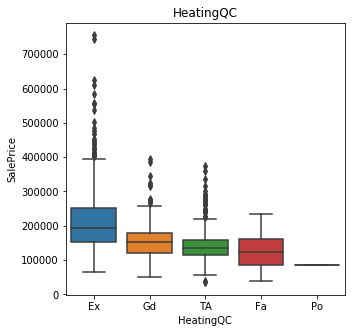

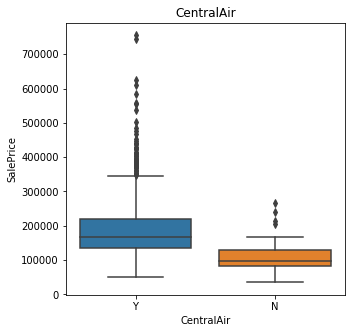

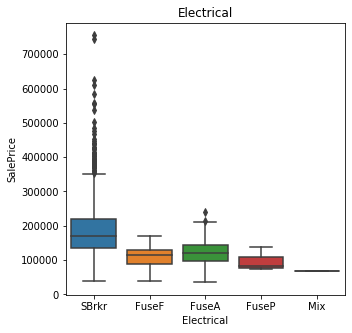

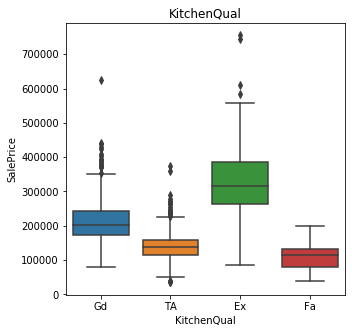

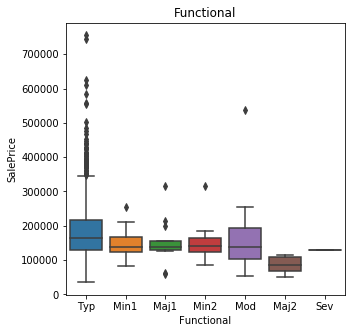

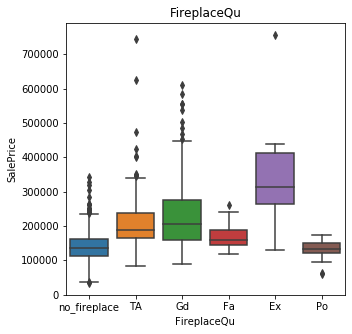

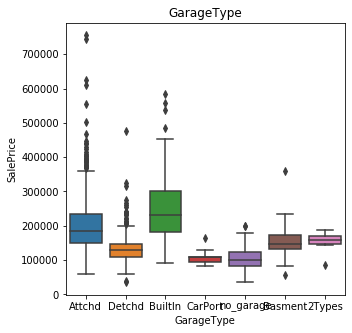

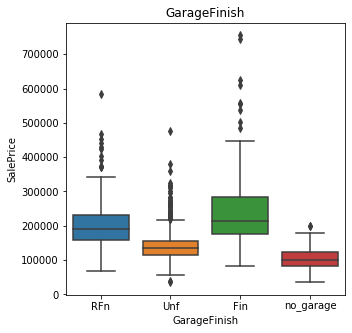

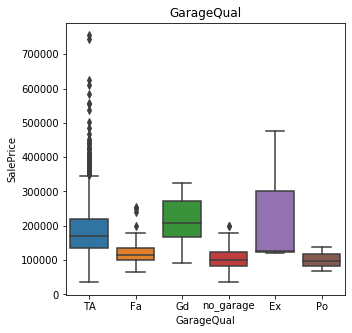

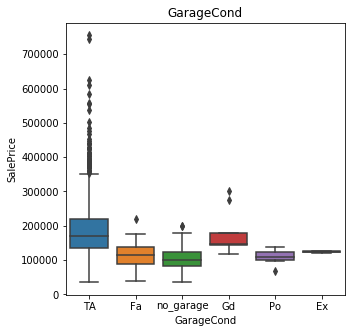

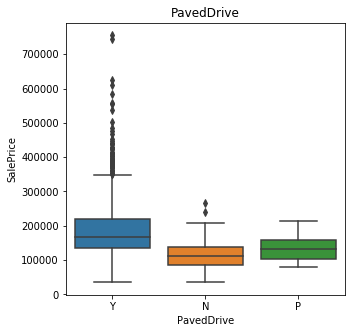

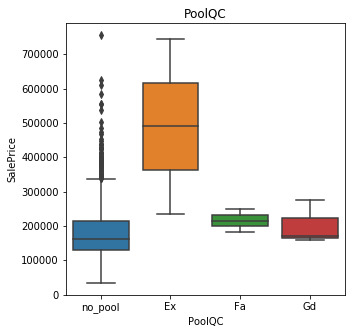

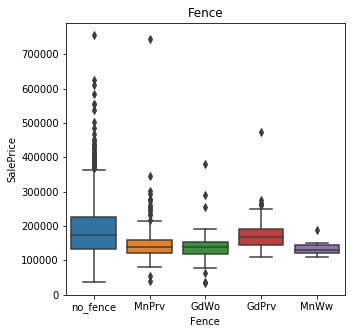

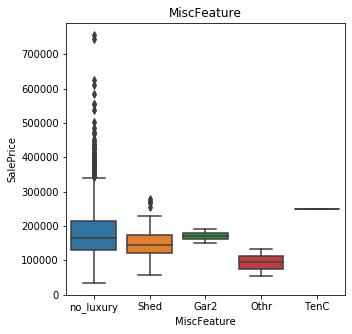

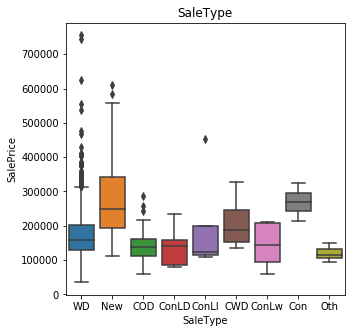

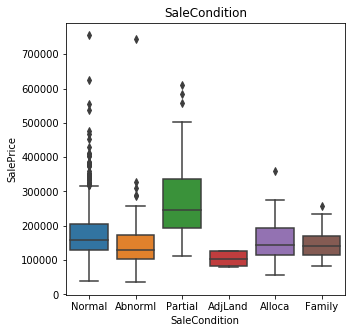

In [40]:
for i in cat_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=data[i],y=data['SalePrice'],data=data)
    plt.title(i)

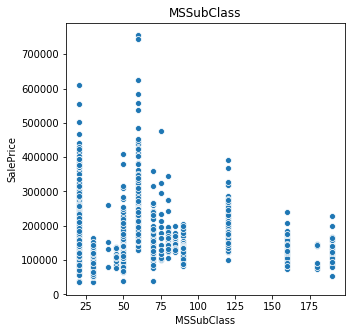

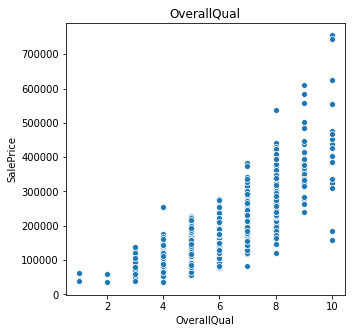

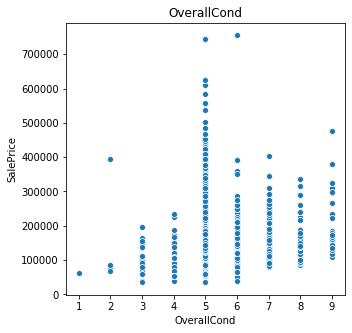

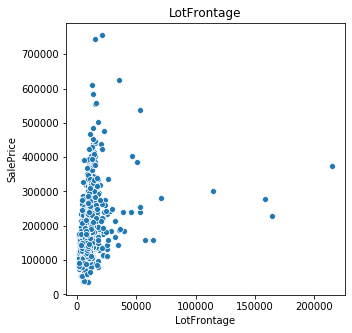

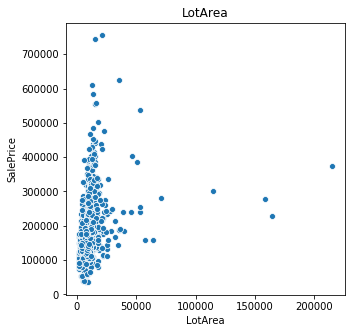

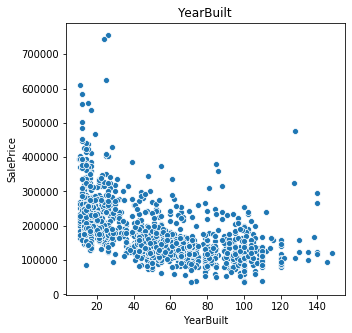

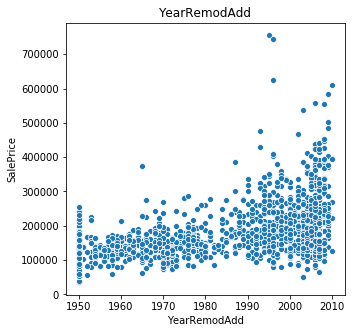

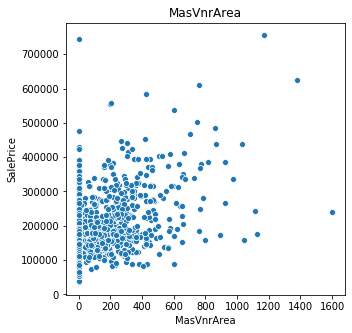

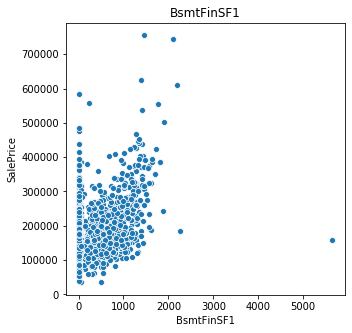

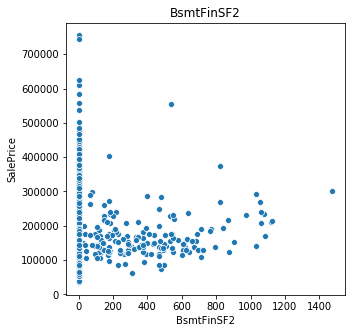

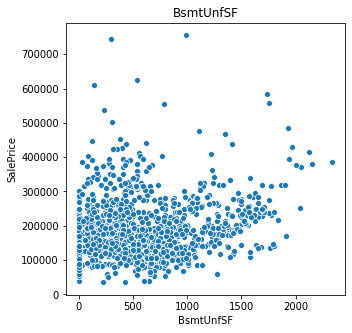

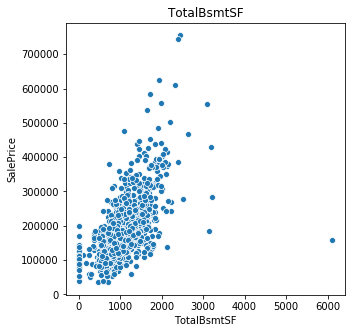

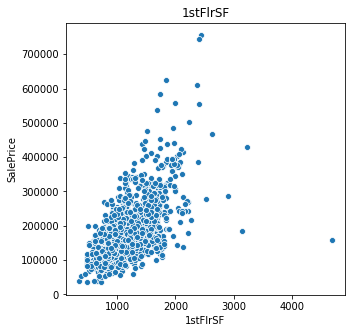

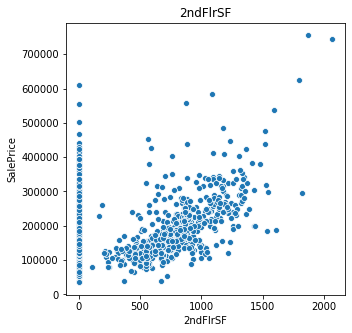

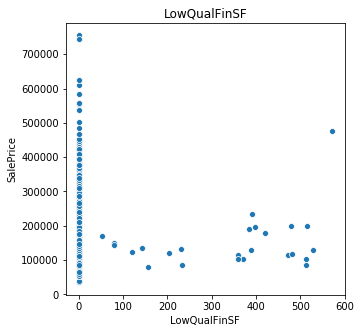

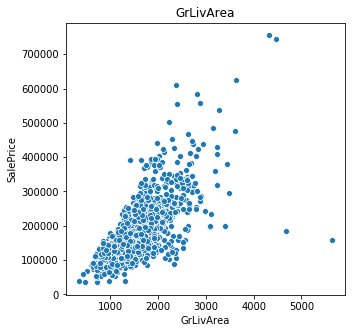

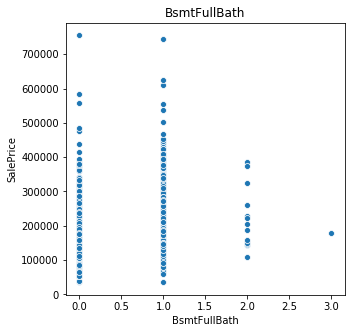

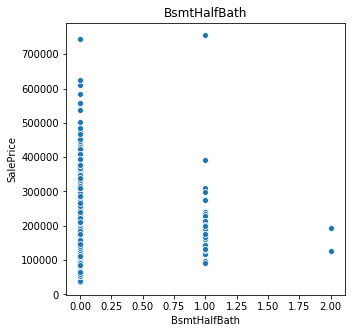

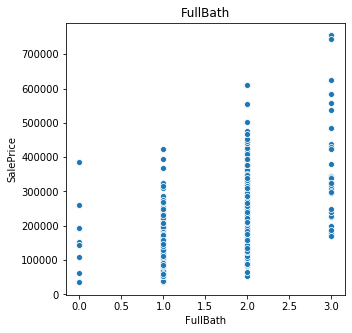

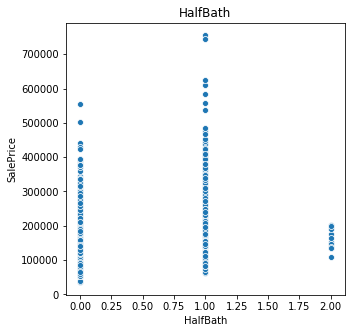

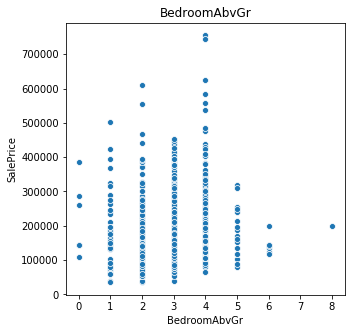

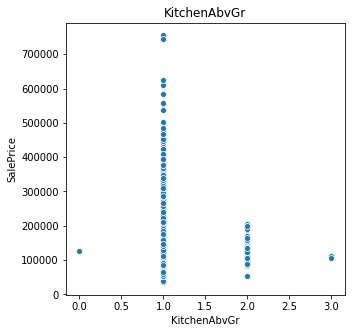

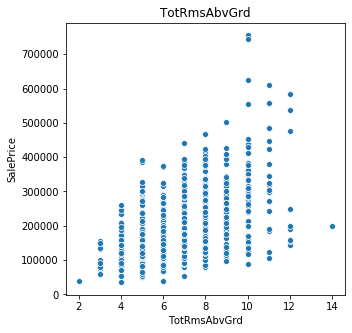

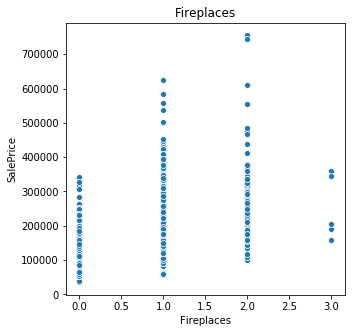

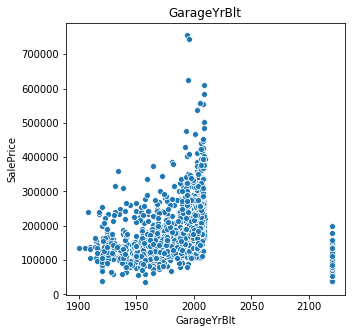

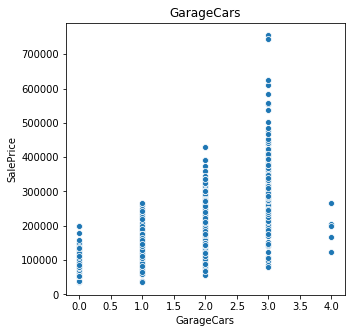

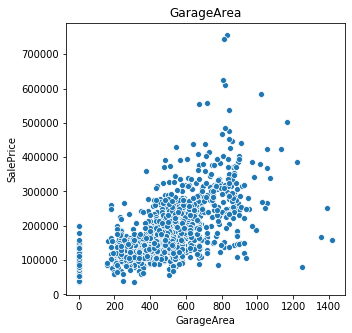

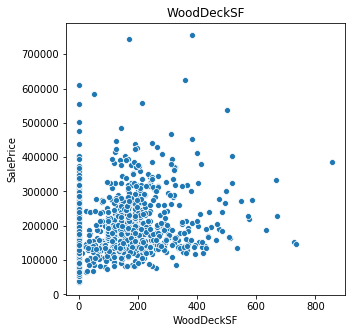

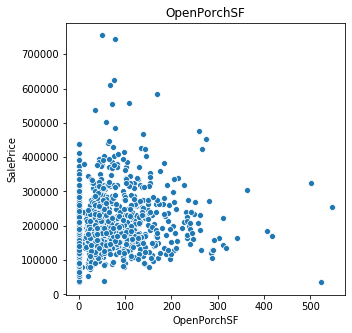

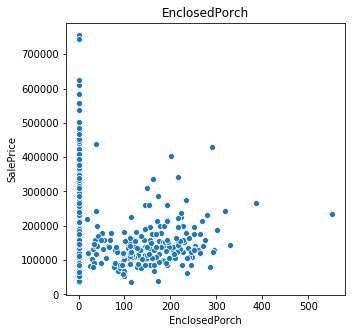

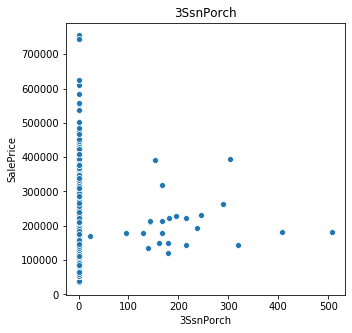

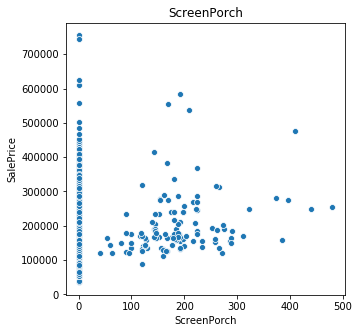

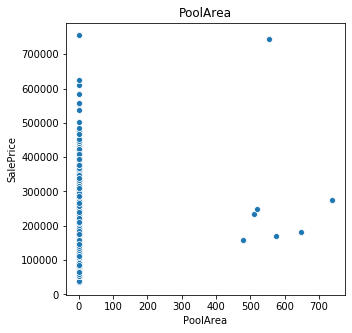

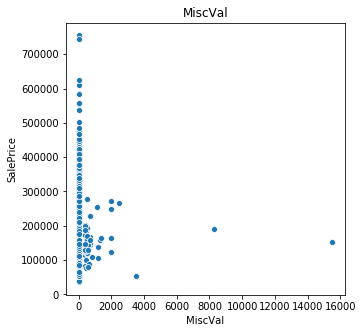

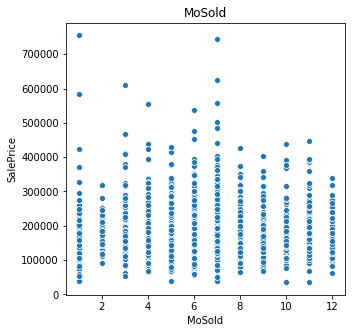

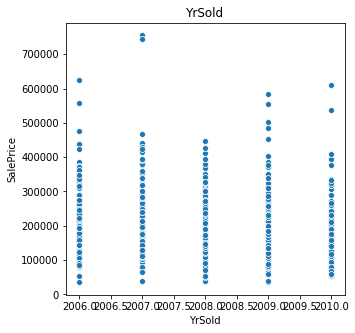

In [41]:
for i in num_cols:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=data[i],y=data['SalePrice'],data=data)
    plt.title(i)

Looking at the plot b/w garage year built and sales price, for no garage, we had put year as 2100, but rather we should put it around 1900, as the prices are distributed such that garages build the oldest have similar prices where there are no garages at all

In [42]:
data['GarageYrBlt'].replace(2120,1900,inplace=True)

In [43]:
data['GarageYrBlt'] = data['GarageYrBlt'].apply(lambda x:2020-int(x))

Text(0.5, 1.0, 'GarageYrBlt')

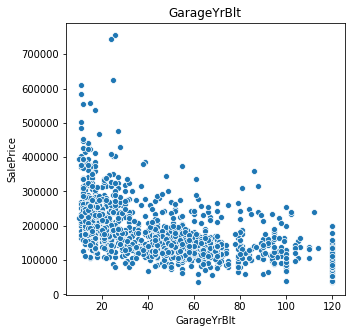

In [44]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=data['GarageYrBlt'],y=data['SalePrice'],data=data)
plt.title('GarageYrBlt')

As can be seen most of the columns don't show any specific trend with the sales prices. We need to get to the features which are significant and determine the prices

Steps I'll follow - <br><br>

1. Converting categorical columns into dummy variables.<br>
2. Scale the features(non categorical) - will use min max scaling<br>
3. Will use gridsearch CV with RFE to find the most significant features.<br>
4. Will use Ridge and Lasso to apply regularisation and see if accuracy improves. Lasso will also give the most significant features. Will use gridsearchCV to find the optimal value of alpha/lambda.<br>

In [45]:
# creating dummy variables
dummies = pd.get_dummies(data[cat_cols],prefix=cat_cols,prefix_sep='_',drop_first=True)

In [46]:
dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_no_alley,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
data = pd.concat([data,dummies],axis=1)

In [48]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,8450,8450,Pave,no_alley,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,9600,9600,Pave,no_alley,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,11250,11250,Pave,no_alley,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,9550,9550,Pave,no_alley,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,14260,14260,Pave,no_alley,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0


In [49]:
# dropping categorical variables as dummy for them have already been created.
data.drop(cat_cols, axis=1, inplace=True)

In [50]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,8450,7,5,17,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,9600,6,8,44,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,11250,7,5,19,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,9550,7,5,105,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,14260,8,5,20,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 261 entries, Id to SaleCondition_Partial
dtypes: float64(1), int64(37), uint8(223)
memory usage: 798.1 KB


### Checking if the target variable is skewed and if yes, resolving it

(array([ 11.,  38.,  99., 232., 273., 217., 172., 102.,  92.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   3.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <a list of 30 Patch objects>)

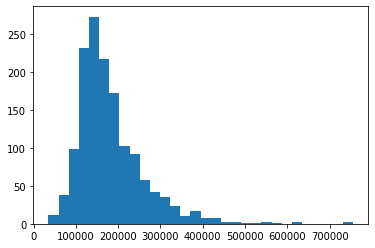

In [52]:
plt.hist(x=data['SalePrice'],bins=30)

As we can see above, there is skewness which indicates prescence of outliers. If we do not do anything about it, the model might not be able to learn the true trend behind the prices as it will try to learn the trend behind outliers which might affect its performance on test data

Applying log function helped normalise the target variable to a large extent. <b>Also before resolving the skewness, the best r2 I could achieve was 0.76 while after resolving it, I could achieve an r2 of 0.81!</b>

In [53]:
data['SalePrice'] = data['SalePrice'].apply(lambda x:np.log(x))

(array([  3.,   2.,   0.,   2.,   3.,   7.,   5.,  10.,  39.,  35.,  49.,
        100., 138., 186., 146., 155., 140.,  98.,  99.,  68.,  52.,  44.,
         22.,  24.,  12.,   3.,   3.,   3.,   1.,   2.]),
 array([10.46024211, 10.56271647, 10.66519084, 10.7676652 , 10.87013956,
        10.97261393, 11.07508829, 11.17756266, 11.28003702, 11.38251138,
        11.48498575, 11.58746011, 11.68993448, 11.79240884, 11.8948832 ,
        11.99735757, 12.09983193, 12.2023063 , 12.30478066, 12.40725502,
        12.50972939, 12.61220375, 12.71467812, 12.81715248, 12.91962684,
        13.02210121, 13.12457557, 13.22704994, 13.3295243 , 13.43199866,
        13.53447303]),
 <a list of 30 Patch objects>)

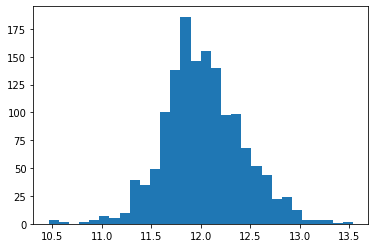

In [54]:
plt.hist(x=data['SalePrice'],bins=30)

<b>Skewness has been quite prominantly resolved!</b>

In [55]:
# spilliting the dataset into training and test set
from sklearn.model_selection import train_test_split

In [56]:
Y = data.pop('SalePrice')
X = data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [58]:
# Scaling X_train
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [59]:
# importing various libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

## Using RFE with GridSearchCV

In [60]:
# We are applying gridsearchcv to see what are the optimal number of features to use.

folds = KFold(n_splits=5,shuffle=True)

hyper_params = [{'n_features_to_select':list(range(1,len(X_train.columns)+1))}]

In [61]:
# using linear regression algo to model the features

lm = LinearRegression()

lm.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
rfe = RFE(lm)

In [63]:
# Gridsearchcv will apply Recursive feature Elimination(rfe) one by one on the number of features we have given as the 
# hyperparameter 'hyper_params'. We will then see what number of features to select after seeing the training and test errors

model_cv = GridSearchCV(estimator=rfe,param_grid=hyper_params,scoring='r2',cv=folds,verbose=1,return_train_score=True,n_jobs=5)

## Will take 15 mins to run the GridSearchCV for 1300 fits

In [64]:
model_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 260 candidates, totalling 1300 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   47.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  3.2min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  7.0min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 11.7min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed: 14.9min
[Parallel(n_jobs=5)]: Done 1300 out of 1300 | elapsed: 15.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=5,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [66]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.224251,0.115471,0.0,0.0,1,{'n_features_to_select': 1},0.677088,0.567526,0.665140,0.658345,...,0.598627,0.095159,30,0.677120,0.514567,0.679628,0.679993,0.420482,0.594358,0.107753
1,5.621809,0.097104,0.0,0.0,2,{'n_features_to_select': 2},0.724076,0.635492,0.710167,0.752035,...,0.652229,0.113212,29,0.716171,0.591739,0.719031,0.761704,0.446258,0.646981,0.115309
2,5.205026,0.098995,0.0,0.0,3,{'n_features_to_select': 3},0.724108,0.639248,0.710711,0.751467,...,0.697229,0.041329,28,0.720514,0.606872,0.723334,0.766278,0.685766,0.700553,0.053352
3,4.982325,0.161920,0.0,0.0,4,{'n_features_to_select': 4},0.783830,0.705429,0.757120,0.799863,...,0.742270,0.050140,27,0.765237,0.677351,0.771305,0.810279,0.687483,0.742331,0.051404
4,4.630162,0.077541,0.0,0.0,5,{'n_features_to_select': 5},0.783915,0.705226,0.766465,0.810921,...,0.746327,0.053405,26,0.768543,0.685471,0.776209,0.820186,0.691117,0.748305,0.052103


In [67]:
# the top 10 ranks
cv_results[(cv_results['rank_test_score']>=1)&(cv_results['rank_test_score']<=10)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
22,4.777000,0.050763,0.000000,0.000000,23,{'n_features_to_select': 23},0.812184,0.755413,0.895590,0.878243,...,0.802610,0.082140,10,0.862062,0.726477,0.908497,0.910985,0.720987,0.825801,0.085160
23,4.527060,0.131960,0.000000,0.000000,24,{'n_features_to_select': 24},0.812184,0.755413,0.895684,0.889673,...,0.804655,0.084762,2,0.862062,0.726477,0.909045,0.915107,0.721115,0.826761,0.086070
24,4.826989,0.058451,0.000000,0.000000,25,{'n_features_to_select': 25},0.811803,0.755413,0.895625,0.890158,...,0.804663,0.084840,1,0.862066,0.726477,0.909239,0.915324,0.721115,0.826844,0.086152
25,4.542680,0.153503,0.000000,0.000000,26,{'n_features_to_select': 26},0.811803,0.755413,0.895420,0.888633,...,0.804439,0.084299,5,0.862066,0.726477,0.909778,0.916312,0.721115,0.827149,0.086458
26,4.786371,0.165497,0.003124,0.006249,27,{'n_features_to_select': 27},0.811803,0.755342,0.895528,0.888629,...,0.804470,0.084291,4,0.862066,0.726477,0.909791,0.916312,0.721115,0.827152,0.086461
27,4.652032,0.140903,0.009373,0.018746,28,{'n_features_to_select': 28},0.811803,0.755519,0.895578,0.888964,...,0.804578,0.084355,3,0.862066,0.726484,0.909814,0.916379,0.721115,0.827172,0.086477
28,4.639533,0.097806,0.000000,0.000000,29,{'n_features_to_select': 29},0.811854,0.755032,0.895705,0.888598,...,0.804416,0.084410,6,0.862082,0.726520,0.909893,0.916756,0.721189,0.827288,0.086545
29,4.717641,0.131441,0.000000,0.000000,30,{'n_features_to_select': 30},0.811922,0.755088,0.894478,0.886911,...,0.803833,0.083846,8,0.862088,0.726521,0.910038,0.917027,0.721189,0.827373,0.086629
30,4.563134,0.090482,0.003123,0.006247,31,{'n_features_to_select': 31},0.811922,0.755088,0.894420,0.886872,...,0.803814,0.083826,9,0.862088,0.726521,0.913968,0.917450,0.721189,0.828243,0.087476
31,4.710256,0.225640,0.000000,0.000000,32,{'n_features_to_select': 32},0.811922,0.755088,0.895846,0.886767,...,0.804078,0.084114,7,0.862088,0.726521,0.914054,0.917464,0.721189,0.828263,0.087496


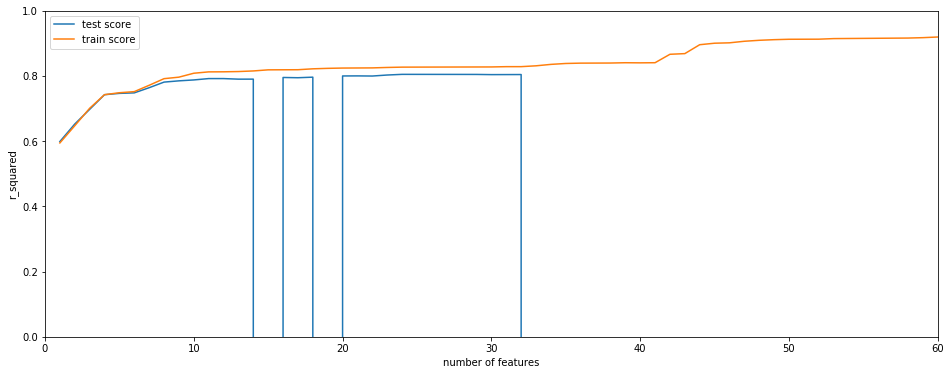

In [68]:
# plotting the results
plt.figure(figsize=(16,6))
plt.plot(cv_results['param_n_features_to_select'],cv_results['mean_test_score'])
plt.plot(cv_results['param_n_features_to_select'],cv_results['mean_train_score'])
plt.ylabel('r_squared')
plt.xlabel('number of features')
plt.ylim(0, 1)
plt.xlim(0,60)
plt.legend(['test score','train score'],loc='upper left')

In [69]:
optimal_features=28

In [70]:
lm=LinearRegression()
lm.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
rfe = RFE(lm,n_features_to_select=optimal_features)

In [72]:
rfe = rfe.fit(X_train_scaled,y_train)

In [73]:
# the ones which have True are the ones which got selected. The lower the ranking, the more significant the variable
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Id', False, 90),
 ('MSSubClass', False, 69),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 116),
 ('MasVnrArea', False, 57),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 109),
 ('BsmtHalfBath', False, 153),
 ('FullBath', False, 227),
 ('HalfBath', False, 181),
 ('BedroomAbvGr', False, 151),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 99),
 ('Fireplaces', False, 61),
 ('GarageYrBlt', False, 187),
 ('GarageCars', True, 1),
 ('GarageArea', False, 136),
 ('WoodDeckSF', False, 147),
 ('OpenPorchSF', False, 58),
 ('EnclosedPorch', False, 165),
 ('3SsnPorch', False, 71),
 ('ScreenPorch', False, 40),
 ('PoolArea', False, 88),
 ('MiscVal', False, 83),
 ('MoSold', False, 200),
 ('YrSold', False, 

In [74]:
# Selected variables using RFE
X_train.columns[rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars',
       'LandSlope_Sev', 'Condition2_RRAe', 'RoofStyle_Shed', 'RoofMatl_Metal',
       'RoofMatl_WdShake', 'Exterior1st_BrkComm', 'BsmtFinType1_no_basement',
       'BsmtFinType2_no_basement', 'Heating_Grav', 'Functional_Maj2',
       'Functional_Sev', 'PoolQC_Gd', 'SaleType_ConLI'],
      dtype='object')

<b>The above variables are the ones which are the most significant in determining the prices.</b> We can use statsmodel api to find which among these are the most significant. But we won't go ahead with that as we will see that the model using Ridge or Lasso regression performs way better than this and we will use feature coefficients from those models.

In [75]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [76]:
X_train_scaled.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.711934,0.823529,0.001426,0.001426,0.333333,0.571429,0.284672,0.966667,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.211934,0.000000,0.067813,0.067813,0.888889,0.428571,0.043796,0.900000,0.0,0.582267,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.316872,0.000000,0.042734,0.042734,0.444444,0.428571,0.321168,0.250000,0.0,0.252742,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.467078,0.176471,0.019589,0.019589,0.444444,0.428571,0.562044,0.833333,0.0,0.083181,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.886145,0.294118,0.032444,0.032444,0.444444,0.285714,0.854015,0.250000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [77]:
X_train_to_select = X_train_scaled[X_train.columns[rfe.support_]]

In [78]:
X_train_to_select.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,RoofMatl_Metal,RoofMatl_WdShake,Exterior1st_BrkComm,BsmtFinType1_no_basement,BsmtFinType2_no_basement,Heating_Grav,Functional_Maj2,Functional_Sev,PoolQC_Gd,SaleType_ConLI
0,0.001426,0.001426,0.333333,0.571429,0.284672,0.000000,0.000000,0.233733,0.170625,0.160332,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.067813,0.067813,0.888889,0.428571,0.043796,0.582267,0.000000,0.266267,0.592500,0.556323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.042734,0.042734,0.444444,0.428571,0.321168,0.252742,0.210991,0.000000,0.270000,0.183138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.019589,0.019589,0.444444,0.428571,0.562044,0.083181,0.000000,0.261558,0.247813,0.177609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.032444,0.032444,0.444444,0.285714,0.854015,0.000000,0.000000,0.425514,0.310625,0.360746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
lm.fit(X_train_to_select,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
# scaling the test set before applying the model
X_test_scaled = scaler.transform(X_test)

In [81]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [82]:
X_test_to_select = X_test_scaled[X_test.columns[rfe.support_]]

In [83]:
# predicted o/p
y_pred = lm.predict(X_test_to_select)

In [84]:
from sklearn.metrics import r2_score

In [85]:
r2 = r2_score(y_test,y_pred)

In [86]:
# r sqaured metric on test set
r2

0.645244200182339

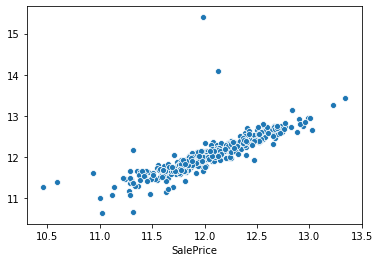

In [87]:
sns.scatterplot(x=y_test,y=y_pred)

In [88]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [89]:
mse_rfe = mean_squared_error(y_test,y_pred)

In [90]:
mae_rfe = mean_absolute_error(y_test,y_pred)

In [91]:
mae_rfe

0.10664528055835104

In [92]:
y_test.mean()

12.015025230076024

In [93]:
(mae_rfe/y_test.mean())*100

0.8875993060039231

## Using Ridge and Lasso

In [94]:
from sklearn.linear_model import Lasso

In [95]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.1, 1.0, 5.0, 10.0,100.0,1000,10000]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)  

model_cv.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.1, 1.0, 5.0, 10.0, 100.0, 1000,
                                   10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [96]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021870,0.007654,0.000000,0.000000,0.001,{'alpha': 0.001},0.926608,0.915420,0.872955,0.921874,...,0.909147,0.019049,1,0.927103,0.930729,0.937062,0.928053,0.931325,0.930854,0.003484
1,0.015621,0.000001,0.000000,0.000000,0.1,{'alpha': 0.1},0.085424,0.106737,0.106824,0.102465,...,0.100965,0.007978,2,0.091975,0.108099,0.110701,0.097049,0.127431,0.107051,0.012305
2,0.010771,0.001596,0.002394,0.000488,1,{'alpha': 1.0},-0.016521,-0.000685,-0.002420,-0.003357,...,-0.004607,0.006087,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.009520,0.003294,0.000797,0.000746,5,{'alpha': 5.0},-0.016521,-0.000685,-0.002420,-0.003357,...,-0.004607,0.006087,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003125,0.006250,0.003124,0.006249,10,{'alpha': 10.0},-0.016521,-0.000685,-0.002420,-0.003357,...,-0.004607,0.006087,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.012504,0.006252,0.003125,0.006249,100,{'alpha': 100.0},-0.016521,-0.000685,-0.002420,-0.003357,...,-0.004607,0.006087,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.006250,0.007654,0.003124,0.006248,1000,{'alpha': 1000},-0.016521,-0.000685,-0.002420,-0.003357,...,-0.004607,0.006087,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.006250,0.007655,0.003123,0.006246,10000,{'alpha': 10000},-0.016521,-0.000685,-0.002420,-0.003357,...,-0.004607,0.006087,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


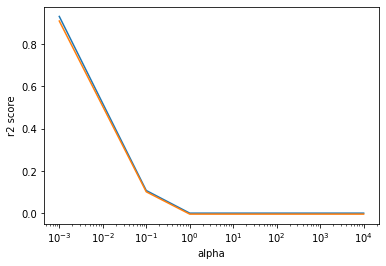

In [97]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

As can be seen from above, alpha of 0.001 gives a good r2 for both training and test data.

In [98]:
lasso = Lasso(alpha=0.001)

In [99]:
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
# scaling the test data before applying the model
X_test_scaled_lasso = scaler.transform(X_test)

In [101]:
y_pred_lasso = lasso.predict(X_test_scaled_lasso)

In [102]:
# calculating R2
r2_score(y_test,y_pred_lasso)

0.7803698116548985

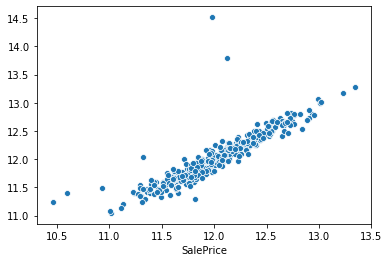

In [103]:
sns.scatterplot(y_test,y_pred_lasso)

In [104]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [105]:
mae_lasso = mean_absolute_error(y_test,y_pred_lasso)

In [106]:
mae_lasso

0.08891504205215553

In [107]:
y_test.mean()

12.015025230076024

In [108]:
print("% deviation of predicted data from mean - {}%".format(round((mae_lasso/y_test.mean())*100),2))

% deviation of predicted data from mean - 1.0%


In [109]:
# coefficient of features
model_parameters = list(lasso.coef_)

In [110]:
# inserting the intercept at the starting of the coefficients
model_parameters.insert(0,lasso.intercept_)

In [111]:
# rounding off the coefficients
model_parameters = [round(x,3) for x in model_parameters]

In [112]:
cols = X_train.columns

In [113]:
cols = cols.insert(0,'constant')

In [114]:
k = list(zip(cols,model_parameters))

In [115]:
# printing the features which were not eliminated while lasso did feature selection
count=0
dictt = {}
for i,j in k:
    if abs(j)!=0:
        count+=1
        dictt[i]=j
        print(i,",",j)

constant , 10.852
Id , -0.004
MSSubClass , -0.076
OverallQual , 0.559
OverallCond , 0.238
YearBuilt , -0.15
YearRemodAdd , 0.064
BsmtFinSF1 , 0.138
TotalBsmtSF , 0.296
GrLivArea , 1.079
BsmtFullBath , 0.043
FullBath , 0.004
Fireplaces , 0.028
GarageYrBlt , -0.002
GarageCars , 0.198
GarageArea , 0.015
WoodDeckSF , 0.041
OpenPorchSF , 0.061
ScreenPorch , 0.032
MSZoning_FV , 0.028
MSZoning_RL , 0.012
MSZoning_RM , -0.054
LotShape_IR2 , 0.011
LotShape_Reg , -0.011
LotConfig_CulDSac , 0.026
LotConfig_Inside , -0.006
Neighborhood_ClearCr , 0.017
Neighborhood_Crawfor , 0.072
Neighborhood_Edwards , -0.024
Neighborhood_MeadowV , -0.008
Neighborhood_NridgHt , 0.041
Neighborhood_OldTown , -0.012
Neighborhood_StoneBr , 0.051
Condition1_Norm , 0.034
BldgType_Twnhs , -0.03
HouseStyle_1Story , -0.016
RoofStyle_Gable , -0.019
Exterior1st_BrkFace , 0.05
Exterior1st_HdBoard , -0.007
Exterior1st_MetalSd , 0.008
MasVnrType_Stone , 0.023
ExterQual_TA , -0.017
ExterCond_TA , 0.005
Foundation_PConc , 0.031
B

In [116]:
# sorting the dictionary containing the significant features based on the coefficient values

import operator

sorted_dictt = sorted(dictt.items(), key=operator.itemgetter(1))

<b>Sorted List of the most significant features as per the Lasso Model</b>

In [117]:
sorted_dictt

[('YearBuilt', -0.15),
 ('MSSubClass', -0.076),
 ('MSZoning_RM', -0.054),
 ('BldgType_Twnhs', -0.03),
 ('Neighborhood_Edwards', -0.024),
 ('BsmtFinType1_Unf', -0.024),
 ('FireplaceQu_no_fireplace', -0.024),
 ('KitchenQual_TA', -0.02),
 ('RoofStyle_Gable', -0.019),
 ('HeatingQC_TA', -0.019),
 ('ExterQual_TA', -0.017),
 ('HouseStyle_1Story', -0.016),
 ('BsmtQual_TA', -0.016),
 ('Neighborhood_OldTown', -0.012),
 ('LotShape_Reg', -0.011),
 ('HeatingQC_Gd', -0.01),
 ('HeatingQC_Fa', -0.009),
 ('KitchenQual_Gd', -0.009),
 ('Neighborhood_MeadowV', -0.008),
 ('Exterior1st_HdBoard', -0.007),
 ('BsmtFinType2_BLQ', -0.007),
 ('LotConfig_Inside', -0.006),
 ('GarageType_no_garage', -0.006),
 ('BsmtQual_Gd', -0.005),
 ('Id', -0.004),
 ('GarageQual_no_garage', -0.004),
 ('BsmtExposure_No', -0.003),
 ('GarageYrBlt', -0.002),
 ('SaleType_WD', -0.001),
 ('BsmtFinType1_BLQ', 0.001),
 ('FullBath', 0.004),
 ('GarageCond_TA', 0.004),
 ('ExterCond_TA', 0.005),
 ('GarageQual_TA', 0.007),
 ('Exterior1st_MetalS

In [118]:
# list of features which were eliminated out using Lasso as they are not significant enough to drive prices
for i,j in k:
    if j==0:
        print(i,",",j)

LotFrontage , 0.0
LotArea , 0.0
MasVnrArea , 0.0
BsmtFinSF2 , 0.0
BsmtUnfSF , 0.0
1stFlrSF , 0.0
2ndFlrSF , 0.0
LowQualFinSF , -0.0
BsmtHalfBath , -0.0
HalfBath , 0.0
BedroomAbvGr , 0.0
KitchenAbvGr , -0.0
TotRmsAbvGrd , 0.0
EnclosedPorch , 0.0
3SsnPorch , 0.0
PoolArea , 0.0
MiscVal , -0.0
MoSold , -0.0
YrSold , -0.0
MSZoning_RH , 0.0
Street_Pave , -0.0
Alley_Pave , 0.0
Alley_no_alley , -0.0
LotShape_IR3 , 0.0
LandContour_HLS , 0.0
LandContour_Low , -0.0
LandContour_Lvl , -0.0
Utilities_NoSeWa , -0.0
LotConfig_FR2 , -0.0
LotConfig_FR3 , -0.0
LandSlope_Mod , 0.0
LandSlope_Sev , -0.0
Neighborhood_Blueste , -0.0
Neighborhood_BrDale , -0.0
Neighborhood_BrkSide , 0.0
Neighborhood_CollgCr , 0.0
Neighborhood_Gilbert , -0.0
Neighborhood_IDOTRR , -0.0
Neighborhood_Mitchel , -0.0
Neighborhood_NAmes , -0.0
Neighborhood_NPkVill , -0.0
Neighborhood_NWAmes , 0.0
Neighborhood_NoRidge , 0.0
Neighborhood_SWISU , -0.0
Neighborhood_Sawyer , -0.0
Neighborhood_SawyerW , -0.0
Neighborhood_Somerst , 0.0
Neig

### Applying Ridge

In [119]:
from sklearn.linear_model import Ridge

In [120]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.1, 1.0, 5.0, 10.0,100.0,1000,10000]}

# grid search
# lasso model
model = Ridge()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_scaled, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.1, 1.0, 5.0, 10.0, 100.0, 1000,
                                   10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [121]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012053,0.003066,0.000598,0.000797,0.001,{'alpha': 0.001},0.896647,0.890157,0.878077,0.892536,...,0.887463,0.007260,5,0.957888,0.958536,0.961542,0.958522,0.961747,0.959647,0.001649
1,0.006249,0.007653,0.003124,0.006248,0.1,{'alpha': 0.1},0.909242,0.900290,0.882653,0.903115,...,0.898312,0.008899,4,0.957160,0.958132,0.961177,0.958045,0.961090,0.959121,0.001678
2,0.009374,0.007654,0.000000,0.000000,1,{'alpha': 1.0},0.921250,0.911184,0.886589,0.917018,...,0.907665,0.012312,1,0.952103,0.953476,0.957137,0.953100,0.956423,0.954448,0.001969
3,0.012444,0.001744,0.001996,0.000632,5,{'alpha': 5.0},0.924898,0.909967,0.876742,0.921244,...,0.905993,0.017556,2,0.939744,0.941361,0.946731,0.940832,0.944633,0.942660,0.002608
4,0.010318,0.004471,0.001396,0.001353,10,{'alpha': 10.0},0.922596,0.901351,0.865866,0.917845,...,0.899322,0.020577,3,0.929049,0.930771,0.937418,0.930212,0.934551,0.932400,0.003114
5,0.012497,0.011690,0.003125,0.006249,100,{'alpha': 100.0},0.862460,0.794420,0.768434,0.841256,...,0.814444,0.033540,6,0.830988,0.840310,0.848800,0.835029,0.840877,0.839201,0.006017
6,0.012498,0.006249,0.006248,0.007653,1000,{'alpha': 1000},0.621173,0.553237,0.553103,0.597628,...,0.577367,0.027402,7,0.574618,0.596895,0.601851,0.585089,0.592298,0.590150,0.009528
7,0.018745,0.006249,0.003124,0.006248,10000,{'alpha': 10000},0.161703,0.155524,0.158805,0.165306,...,0.159643,0.003509,8,0.158283,0.169866,0.168810,0.164521,0.168016,0.165899,0.004209


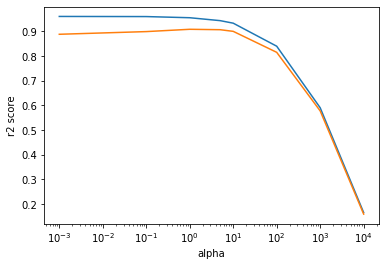

In [122]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

The optimal value of Alpha is around 10. Using 20, gave me the best result and so I went with that.

In [123]:
ridge = Ridge(alpha=20)

In [124]:
ridge.fit(X_train_scaled,y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [125]:
X_test_scaled_ridge = scaler.transform(X_test)

In [126]:
y_pred_ridge = ridge.predict(X_test_scaled_ridge)

### This model gives the best R2 score of 0.81 amongst all the other models that were made

In [127]:
r2_score(y_test,y_pred_ridge)

0.8136052584540533

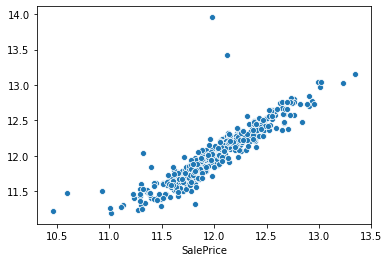

In [128]:
sns.scatterplot(y_test,y_pred_ridge)

In [129]:
mae_ridge = mean_absolute_error(y_test,y_pred_ridge)

In [130]:
print("%deviation of predicted values from the mean value - {}%".format(round((mae_ridge/y_test.mean())*100),2))

%deviation of predicted values from the mean value - 1.0%


In [131]:
# the coefficient of the features
model_parameters = list(ridge.coef_)

In [132]:
# inserting the first coeff as the intercept
model_parameters.insert(0,ridge.intercept_)

In [133]:
# rounding off the coefficients
model_parameters = [round(x,3) for x in model_parameters]

In [134]:
cols = X_train_scaled.columns

In [135]:
cols = cols.insert(0,'constant')

In [136]:
k = list(zip(cols,model_parameters))

In [137]:
# List of coefficients with the feature names
dictt_ridge={}
count=0
for i,j in k:
    if abs(j)!=0:
        dictt_ridge[i]=j
        count+=1
        print(i,",",j)

constant , 11.364
Id , -0.019
MSSubClass , -0.055
LotFrontage , 0.041
LotArea , 0.041
OverallQual , 0.2
OverallCond , 0.118
YearBuilt , -0.044
YearRemodAdd , 0.091
MasVnrArea , 0.055
BsmtFinSF1 , 0.111
BsmtFinSF2 , 0.022
BsmtUnfSF , 0.071
TotalBsmtSF , 0.138
1stFlrSF , 0.167
2ndFlrSF , 0.111
LowQualFinSF , 0.02
GrLivArea , 0.175
BsmtFullBath , 0.051
BsmtHalfBath , -0.011
FullBath , 0.108
HalfBath , 0.05
BedroomAbvGr , 0.06
KitchenAbvGr , -0.015
TotRmsAbvGrd , 0.127
Fireplaces , 0.065
GarageYrBlt , -0.021
GarageCars , 0.106
GarageArea , 0.091
WoodDeckSF , 0.056
OpenPorchSF , 0.067
EnclosedPorch , 0.014
3SsnPorch , 0.011
ScreenPorch , 0.054
PoolArea , 0.028
MiscVal , -0.002
MoSold , 0.01
YrSold , -0.012
MSZoning_FV , 0.03
MSZoning_RH , 0.015
MSZoning_RL , 0.042
MSZoning_RM , -0.018
Street_Pave , -0.002
Alley_Pave , 0.034
Alley_no_alley , -0.009
LotShape_IR2 , 0.027
LotShape_IR3 , -0.001
LotShape_Reg , -0.011
LandContour_HLS , 0.017
LandContour_Low , -0.018
LandContour_Lvl , 0.004
Utiliti

In [138]:
# sorting the dictionary containing the significant features based on the coefficient values

sorted_dictt_ridge = sorted(dictt_ridge.items(), key=operator.itemgetter(1))

<b>Sorted List of the most significant features as per the Ridge Model</b>

In [139]:
sorted_dictt_ridge

[('KitchenQual_TA', -0.069),
 ('Neighborhood_MeadowV', -0.061),
 ('BldgType_Twnhs', -0.06),
 ('ExterQual_TA', -0.06),
 ('BsmtQual_TA', -0.06),
 ('MSSubClass', -0.055),
 ('Neighborhood_Edwards', -0.051),
 ('Functional_Maj2', -0.046),
 ('YearBuilt', -0.044),
 ('BldgType_TwnhsE', -0.043),
 ('KitchenQual_Gd', -0.043),
 ('BsmtQual_Gd', -0.042),
 ('BsmtFinType1_Unf', -0.041),
 ('Neighborhood_IDOTRR', -0.04),
 ('FireplaceQu_no_fireplace', -0.04),
 ('Heating_Grav', -0.039),
 ('HeatingQC_Fa', -0.037),
 ('Neighborhood_Gilbert', -0.036),
 ('LotConfig_FR2', -0.035),
 ('HouseStyle_1Story', -0.035),
 ('KitchenQual_Fa', -0.034),
 ('PoolQC_no_pool', -0.034),
 ('RoofMatl_CompShg', -0.032),
 ('RoofStyle_Gable', -0.031),
 ('HeatingQC_TA', -0.031),
 ('FireplaceQu_Po', -0.03),
 ('ExterQual_Fa', -0.029),
 ('SaleType_WD', -0.029),
 ('BsmtQual_Fa', -0.028),
 ('GarageType_CarPort', -0.028),
 ('Neighborhood_OldTown', -0.027),
 ('BsmtFinType2_BLQ', -0.026),
 ('Neighborhood_Sawyer', -0.025),
 ('Exterior1st_WdShin

### As we had studied that because of the inherent contour shape of the ridge and the error term being such that the probability of their intersection along an axis is quite low,there is hardly any feature elimination that takes place. The same can be seen. There are hardly any features that got completely eliminated

In [140]:
for i,j in k:
    if j==0:
        print(i,",",j)

Neighborhood_NPkVill , -0.0
Condition1_PosA , 0.0
Condition2_Feedr , -0.0
HouseStyle_1.5Unf , 0.0
RoofMatl_Membran , 0.0
RoofMatl_Metal , -0.0
Exterior1st_AsphShn , 0.0
Exterior1st_ImStucc , 0.0
Exterior2nd_HdBoard , -0.0
HeatingQC_Po , 0.0
PoolQC_Fa , 0.0
Fence_MnPrv , 0.0
MiscFeature_TenC , 0.0


### Lets use Ridge and Lasso after applying RFE

In [141]:
# We had already applied RFE above and below are the training and testing data we got after applying RFE
# X_train_to_select --> scaled training data set 
# X_test_to_select --> scaled test data set 

Applying Lasso - 

In [142]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.1, 1.0, 5.0, 10.0,100.0,1000,10000]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_to_select, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.1, 1.0, 5.0, 10.0, 100.0, 1000,
                                   10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [143]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006260,0.007667,0.003112,0.006225,0.001,{'alpha': 0.001},0.903121,0.917615,0.849975,0.878521,...,0.889397,0.023335,1,0.890707,0.889174,0.902883,0.896465,0.894599,0.894766,0.004828
1,0.006257,0.007664,0.000000,0.000000,0.1,{'alpha': 0.1},-0.016521,-0.000685,-0.002420,-0.003357,...,-0.004607,0.006087,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.003124,0.006249,0.000000,0.000000,1,{'alpha': 1.0},-0.016521,-0.000685,-0.002420,-0.003357,...,-0.004607,0.006087,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.006256,0.007661,0.000000,0.000000,5,{'alpha': 5.0},-0.016521,-0.000685,-0.002420,-0.003357,...,-0.004607,0.006087,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.006240,0.007643,0.000000,0.000000,10,{'alpha': 10.0},-0.016521,-0.000685,-0.002420,-0.003357,...,-0.004607,0.006087,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.006250,0.007654,0.000000,0.000000,100,{'alpha': 100.0},-0.016521,-0.000685,-0.002420,-0.003357,...,-0.004607,0.006087,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.003391,0.001739,0.001595,0.000798,1000,{'alpha': 1000},-0.016521,-0.000685,-0.002420,-0.003357,...,-0.004607,0.006087,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.003192,0.001164,0.001395,0.000489,10000,{'alpha': 10000},-0.016521,-0.000685,-0.002420,-0.003357,...,-0.004607,0.006087,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


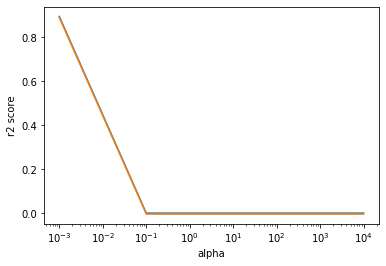

In [144]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [145]:
lasso = Lasso(alpha=0.001)

In [146]:
lasso.fit(X_train_to_select, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [147]:
y_pred_rfe_lasso = lasso.predict(X_test_to_select)

In [148]:
r2_rfe_lasso = r2_score(y_test,y_pred_rfe_lasso)

### R2 value has improved over the model that just used RFE.

In [149]:
r2_rfe_lasso

0.7153330693123752

Applying Ridge - 

In [150]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.1, 1.0, 5.0, 10.0,100.0,1000,10000]}

# grid search
# lasso model
model = Ridge()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_to_select, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.1, 1.0, 5.0, 10.0, 100.0, 1000,
                                   10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [151]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007644,0.007004,0.000598,0.001196,0.001,{'alpha': 0.001},0.911520,0.919297,0.858994,0.887687,...,0.894844,0.021049,3,0.904371,0.904392,0.912551,0.912202,0.909751,0.908653,0.003619
1,0.000000,0.000000,0.003133,0.006266,0.1,{'alpha': 0.1},0.911370,0.919762,0.858909,0.888002,...,0.895095,0.021154,2,0.904303,0.904293,0.912515,0.912106,0.909656,0.908575,0.003626
2,0.000000,0.000000,0.000000,0.000000,1,{'alpha': 1.0},0.909640,0.920870,0.856994,0.888209,...,0.895115,0.021888,1,0.901821,0.901110,0.910992,0.908943,0.906344,0.905842,0.003872
3,0.000000,0.000000,0.003132,0.006265,5,{'alpha': 5.0},0.899805,0.916482,0.842772,0.878994,...,0.886007,0.024779,4,0.889181,0.886831,0.900339,0.894962,0.891819,0.892626,0.004713
4,0.006241,0.007644,0.000000,0.000000,10,{'alpha': 10.0},0.884772,0.903052,0.823094,0.862001,...,0.869700,0.026841,5,0.871797,0.868215,0.884209,0.877226,0.873923,0.875074,0.005426
5,0.001641,0.003282,0.000399,0.000798,100,{'alpha': 100.0},0.588898,0.598689,0.542612,0.572489,...,0.577257,0.019262,6,0.575713,0.573986,0.596885,0.586628,0.578664,0.582375,0.008452
6,0.004388,0.000487,0.001596,0.000489,1000,{'alpha': 1000},0.107411,0.121531,0.110675,0.115812,...,0.114978,0.005287,7,0.117579,0.118005,0.124452,0.121133,0.118227,0.119879,0.002608
7,0.003391,0.000796,0.001796,0.000748,10000,{'alpha': 10000},-0.002781,0.012864,0.010162,0.009887,...,0.008666,0.005894,8,0.013038,0.013101,0.013850,0.013453,0.013107,0.013310,0.000307


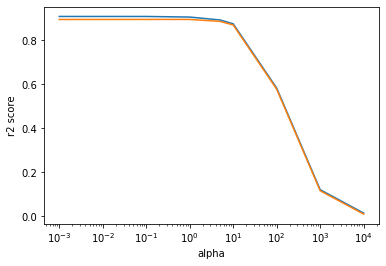

In [152]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [153]:
ridge = Ridge(alpha=1)

In [154]:
ridge.fit(X_train_to_select, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [155]:
y_pred_rfe_ridge = ridge.predict(X_test_to_select)

In [156]:
r2_rfe_ridge = r2_score(y_test,y_pred_rfe_ridge)

### R2 value has improved over the model that just used RFE.

In [157]:
r2_rfe_ridge

0.6755106742899565

## Conclusions - 

## 1. Model with only RFE

R square - 0.64 <br><br>

Most Significant Variables - <br><br>

'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'PoolArea',
       'LandSlope_Sev', 'Condition2_PosN', 'Condition2_RRAe', 'RoofMatl_Metal',
       'RoofMatl_WdShngl', 'Foundation_Wood', 'BsmtQual_no_basement',
       'Heating_OthW', 'Heating_Wall', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Sev', 'PoolQC_Gd', 'PoolQC_no_pool',
       'SaleType_Con', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_Partial'

## 2. Model with Lasso

<b>R Square - 0.78<br><br></b>

Most Significant Variables - <br><br>

Variables that positively affect the price i.e. with increase in units of these variables, the price also increases - <br><br>

'GrLivArea'(Above grade (ground) living area square feet): 1.079<br>
'OverallQual'(Rates the overall material and finish of the house): 0.559,<br>
'TotalBsmtSF'(Total square feet of basement area): 0.296,<br>
'OverallCond'(Rates the overall condition of the house): 0.238,<br>
'GarageCars'(Size of garage in car capacity): 0.198,<br>
'BsmtFinSF1'(Basement Type 1 finished square feet): 0.138,<br>
'SaleType_New'(Home just constructed and sold): 0.108,<br>
'CentralAir_Y'(Prescence of Central air conditioning): 0.075,<br><br>


Variables that negatively affect the price i.e. with increase in units of these variables, the price decreases - <br><br>

'YearBuilt'(Age of the House): -0.15,<br>
'MSSubClass'(Identifies the type of dwelling involved in the sale): -0.076,<br>
'MSZoning_RM'(Residential Medium Density): -0.054,<br>
'BldgType_Twnhs'(Townhouse End Unit): -0.03,<br>
'Neighborhood_Edwards': -0.024,<br>
'BsmtFinType1_Unf'(Unfinshed Basement): -0.024,<br>
'FireplaceQu_no_fireplace'(No Fireplace): -0.024<br>

<h3>P.S. - As we have log of y as the target variable, a unit increase in these variables increases the log(o/p) by 1. Actual price increase can be known by inverse log of the value.</h3>


## 3. Model with Ridge

<b>R Square - 0.81<br><br></b>

Most Significant Variables - <br><br>

Variables that positively affect the price i.e. with increase in units of these variables, the price also increases - <br><br>

'OverallQual'(Rates the overall material and finish of the house): 0.2<br>
'GrLivArea'(Above grade (ground) living area square feet): 0.175<br>
'1stFlrSF'(First Floor square feet): 0.167<br>
'TotalBsmtSF'(Total square feet of basement area): 0.138<br>
'TotRmsAbvGrd'(Total rooms above grade (does not include bathrooms): 0.127<br>
'OverallCond'(Rates the overall condition of the house): 0.118<br>
'2ndFlrSF'(Second floor square feet): 0.111<br>
'BsmtFinSF1'(Basement Type 1 finished square feet): 0.111<br>
'FullBath'(Full bathrooms above grade): 0.108<br><br>


Variables that negatively affect the price i.e. with increase in units of these variables, the price decreases - <br><br>

'KitchenQual_TA'(Average Kitched Quality): -0.069<br>
'Neighborhood_MeadowV'(Meadow Village as a neighborhood): -0.061<br>
'BldgType_Twnhs'(Townhouse End Unit): -0.06<br>
'ExterQual_TA'(Average Exterior Quality): -0.06<br>
'BsmtQual_TA'(Average Basement Quality): -0.06<br>
'MSSubClass'(Identifies the type of dwelling involved in the sale): -0.055<br>
'Neighborhood_Edwards': -0.051<br>

<h3>P.S. - As we have log of y as the target variable, a unit increase in these variables increases the log(o/p) by 1. Actual price increase can be known by inverse log of the value.</h3>

## Model with RFE and then applying Ridge or Lasso

R square - with Lasso - 0.71<br>
R square - with Ridge - 0.67<br><br>

Although there is slight improvement from the model which used just RFE, it performs worst than the model which used only Lasso/Ridge. The reason may be due to underfitting. RFE prunes the features to just 28-30 which might over-simply the model.Applying Ridge and Lasso above it, further simplifies the model. Hence <b>there are very high chances of underfitting.</b>